# EDA for Popular MultiPlayer RTPG Game PUBG

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
from IPython.display import display, Markdown, Latex

In [5]:
train = pd.read_csv('train_V2.csv')

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
Id                 object
groupId            object
matchId            object
assists            int64
boosts             int64
damageDealt        float64
DBNOs              int64
headshotKills      int64
heals              int64
killPlace          int64
killPoints         int64
kills              int64
killStreaks        int64
longestKill        float64
matchDuration      int64
matchType          object
maxPlace           int64
numGroups          int64
rankPoints         int64
revives            int64
rideDistance       float64
roadKills          int64
swimDistance       float64
teamKills          int64
vehicleDestroys    int64
walkDistance       float64
weaponsAcquired    int64
winPoints          int64
winPlacePerc       float64
dtypes: float64(6), int64(19), object(4)
memory usage: 983.9+ MB


### From above table we can see that only 4 features are categorical type

In [7]:
train.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


In [8]:
train.isnull().sum()

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       1
dtype: int64

### As we can see we have only one missing value lets check the missing value

In [10]:
train[train.winPlacePerc.isnull()]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
2744604,f70c74418bb064,12dfbede33f92b,224a123c53e008,0,0,0.0,0,0,0,1,...,0,0.0,0,0.0,0,0,0.0,0,0,NaN


### Eliminating 2744604 from train_data

In [11]:
train.drop(2744604,inplace=True)

In [12]:
train.isnull().sum()

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       0
dtype: int64

### Ok Now Exploring the data

### Average Kill counts

In [13]:
text='''
 #### the average person kills {:.4f} players,
 #### 99% of people have {} kills or less,
 #### while the most kills ever recorded is {}.
'''
display(Markdown(text.format(train['kills'].mean(),train['kills'].quantile(0.99), train['kills'].max())))


 #### the average person kills 0.9248 players,
 #### 99% of people have 7.0 kills or less,
 #### while the most kills ever recorded is 72.


Text(0.5, 1.0, 'Kill Count')

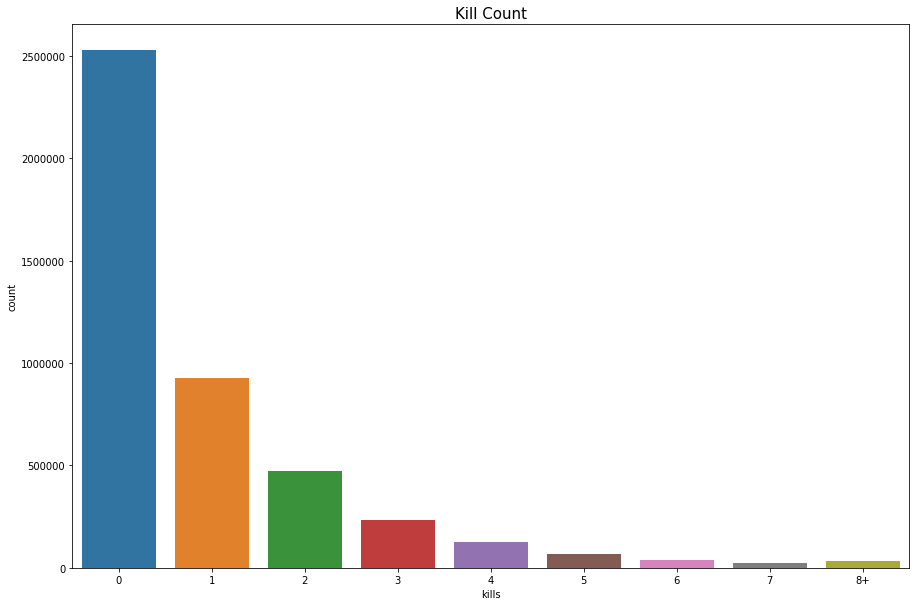

In [14]:
data_temp = train.copy()
data_temp.loc[data_temp['kills'] > data_temp['kills'].quantile(0.99)] = '8+'
plt.figure(figsize=(15,10))
sns.countplot(data_temp['kills'].astype('str').sort_values())
plt.title("Kill Count",fontsize=15)

### From above plot we can see that , About 25 lakhs player cant kill

### Lets check if those player who cant kill can able to deal damage 

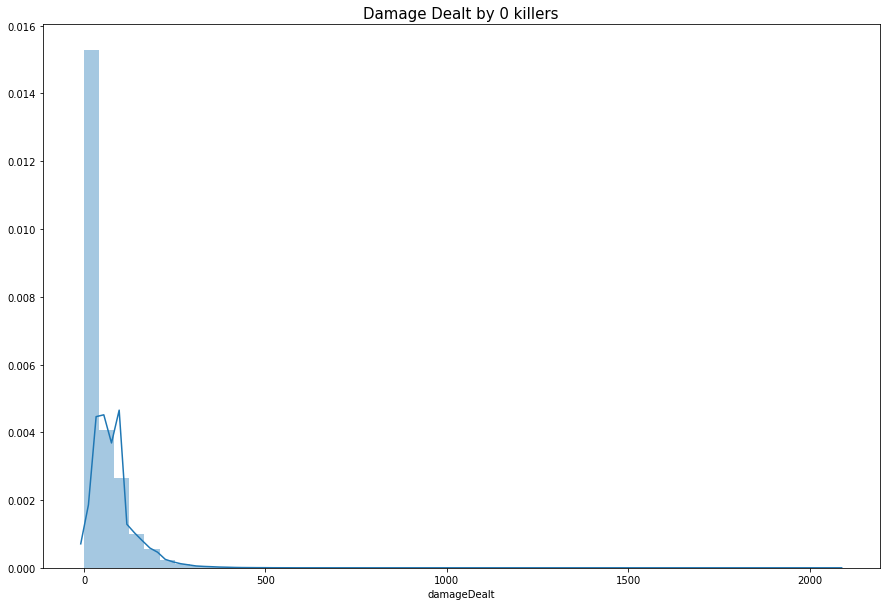

In [15]:
data_temp = train.copy()
data_temp = data_temp[data_temp['kills']==0]
plt.figure(figsize=(15,10))
plt.title("Damage Dealt by 0 killers",fontsize=15)
sns.distplot(data_temp['damageDealt'])

### Well,  most of zero killer player aren't able to do any damage 

In [16]:
text='''
####  {} players ({:.4f}%) have won without a single kill!
'''
display(Markdown(text.format(len(data_temp[data_temp['winPlacePerc']==1]), 100*len(data_temp[data_temp['winPlacePerc']==1])/len(train))))

data1 = train[train['damageDealt'] == 0].copy()

text = "####  {} players ({:.4f}%) have won without dealing damage!"
display(Markdown(text.format(len(data1[data1['winPlacePerc']==1]), 100*len(data1[data1['winPlacePerc']==1])/len(train))))



####  16666 players (0.3748%) have won without a single kill!


####  4770 players (0.1073%) have won without dealing damage!

### Plotting Win percentage vs Kills

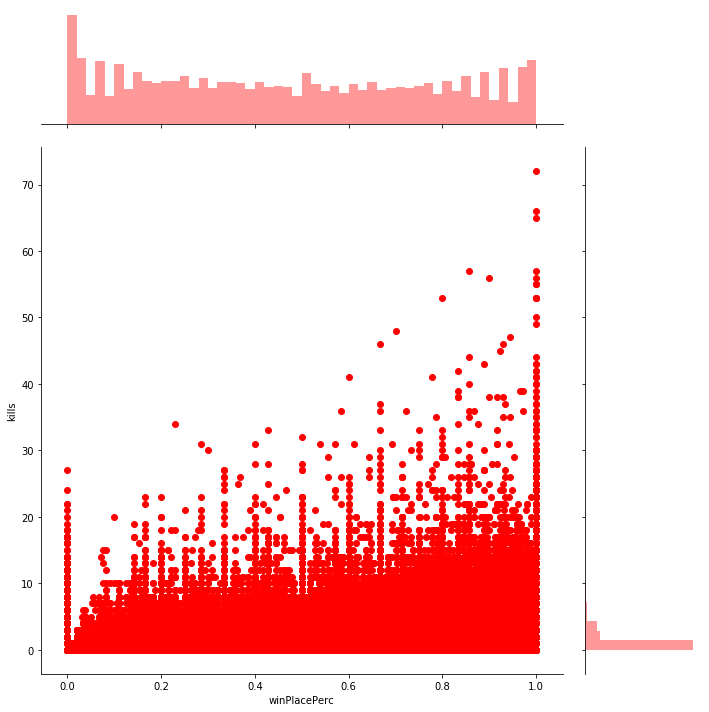

In [17]:
sns.jointplot(x="winPlacePerc", y="kills", data=train, height=10, ratio=4, color="r")

### From above plots we can see that higher the kill , higher is the chance of winning. Hence  there is correlation between winning and killing

### Lets group player based on the their kills and plot against win placement

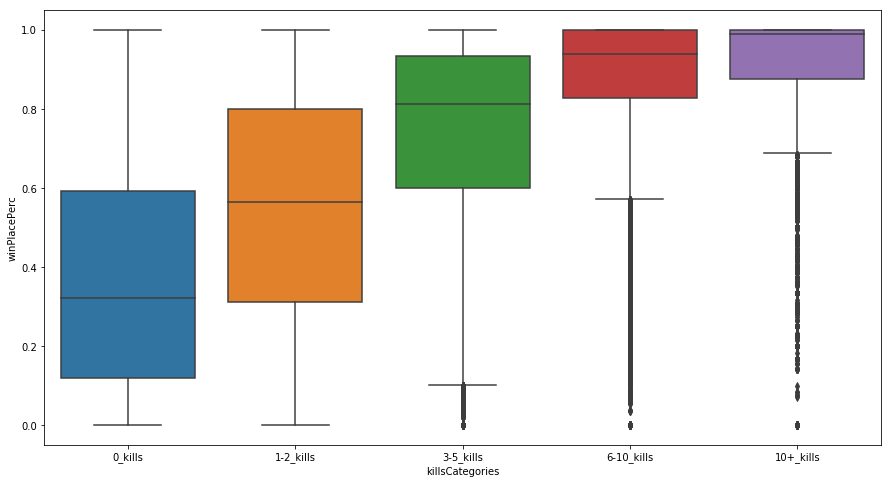

In [18]:
kills = train.copy()

kills['killsCategories'] = pd.cut(kills['kills'], [-1, 0, 2, 5, 10, 60], labels=['0_kills','1-2_kills', '3-5_kills', '6-10_kills', '10+_kills'])
plt.figure(figsize=(15,8))
sns.boxplot(x="killsCategories", y="winPlacePerc", data=kills)

### so as we can see if we are able to kill few player our chance of winning will automatically increase

###  Lets see the relation between the Player Running ability and their win placement 

In [19]:
text = """
####   The average person walks for {:.1f}m,

####   99% of people have walked {}m or less,

####   while the marathoner champion walked for {}m.
"""
display(Markdown(text.format(train['walkDistance'].mean(), train['walkDistance'].quantile(0.99), train['walkDistance'].max())))


####   The average person walks for 1154.2m,

####   99% of people have walked 4396.0m or less,

####   while the marathoner champion walked for 25780.0m.


### According to my experience , More the player walk or run, higher will be the their kill and higher  will be winning chance

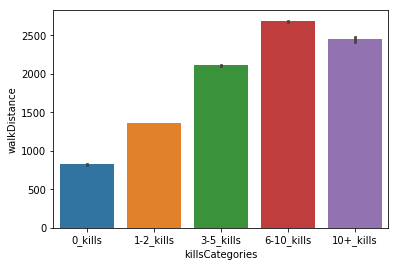

In [20]:
sns.barplot(x='killsCategories',y='walkDistance',data=kills)

In [21]:
text = """
###    {} players ({:.4f}%) walked 0 meters. 

###    This means that they die before even taking a step or they are afk (more possible)

"""
display(Markdown(text.format(len(train[train['walkDistance'] == 0]), 100*len(train[train['walkDistance']==0])/len(train))))


###    99602 players (2.2398%) walked 0 meters. 

###    This means that they die before even taking a step or they are afk (more possible)



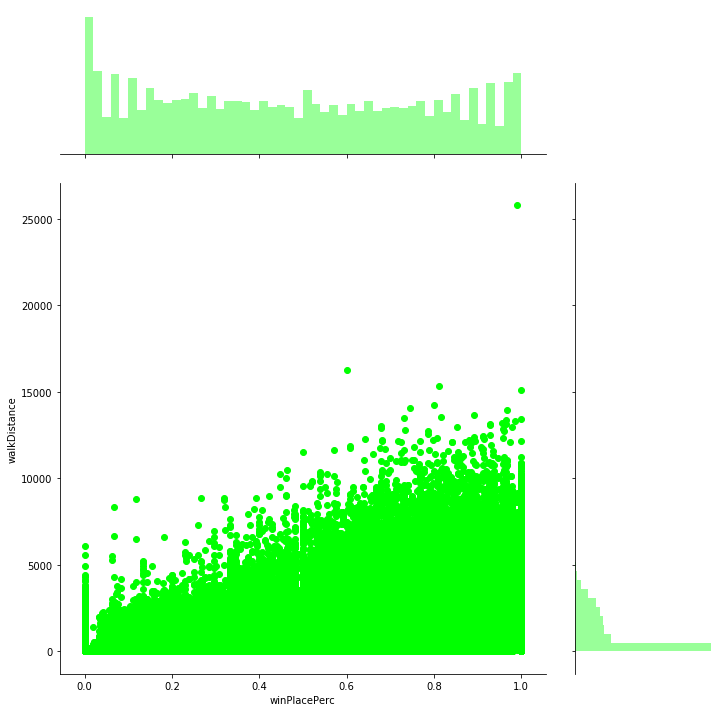

In [22]:
sns.jointplot(x="winPlacePerc", y="walkDistance",  data=kills, height=10, ratio=3, color="lime",)

###  Lets see the relation between the using vehical for transportation and their win placement 

In [23]:
text = """
####   The average person drives for {:.1f}m,

####   99% of people have drived {}m or less,

####   while the formula 1 champion drived for {}m.
"""
display(Markdown(text.format(train['rideDistance'].mean(), train['rideDistance'].quantile(0.99), train['rideDistance'].max())))


####   The average person drives for 606.1m,

####   99% of people have drived 6966.0m or less,

####   while the formula 1 champion drived for 40710.0m.


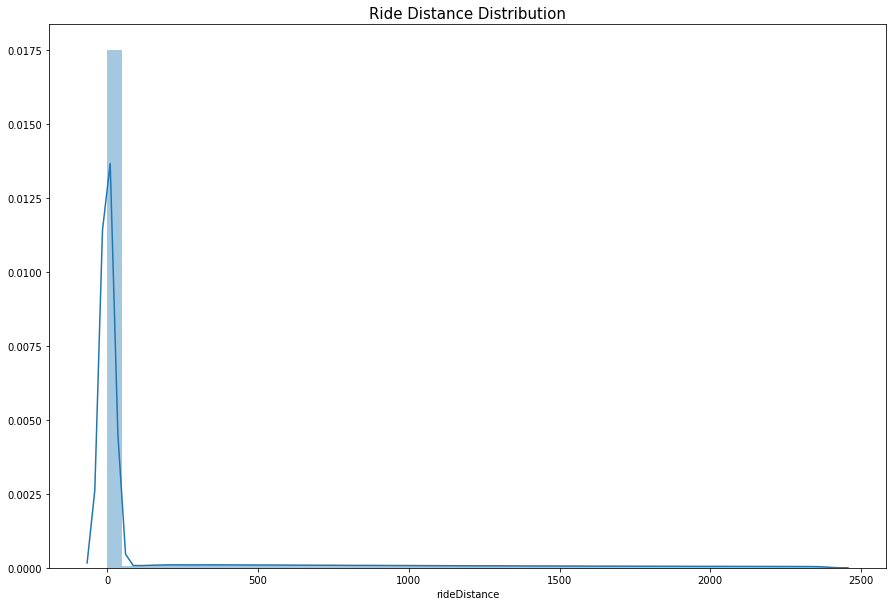

In [24]:
data = train.copy()
data = data[data['rideDistance'] < train['rideDistance'].quantile(0.9)]
plt.figure(figsize=(15,10))
plt.title("Ride Distance Distribution",fontsize=15)
sns.distplot(data['rideDistance'])

### Lets see how many players didn't even touch Vehicals

In [25]:
text = """
###   {} players ({:.4f}%) drived for 0 meters.

###   This means that they don't have a driving licence yet.   :D

"""
display(Markdown(text.format(len(data[data['rideDistance'] == 0]), 100*len(data1[data1['rideDistance']==0])/len(train))))


###   3309428 players (23.1022%) drived for 0 meters.

###   This means that they don't have a driving licence yet.   :D



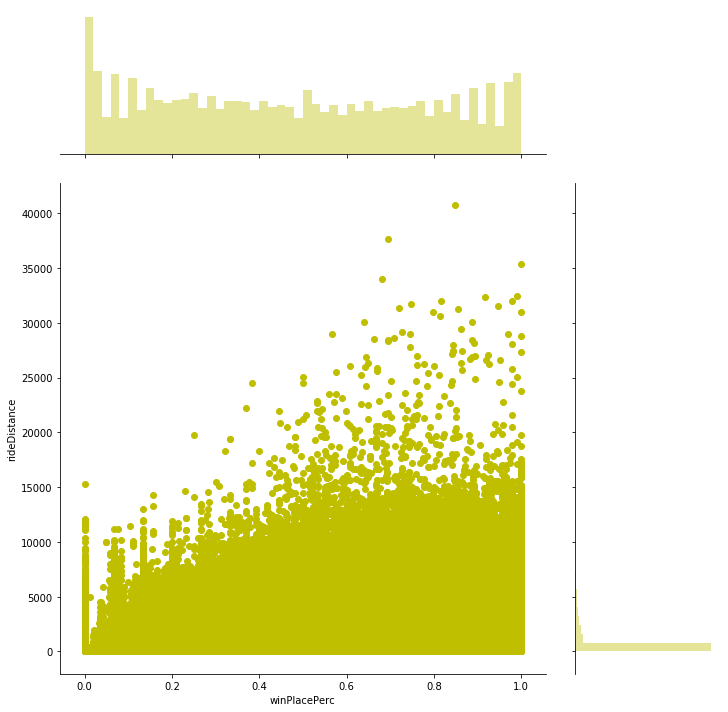

In [26]:
sns.jointplot(x="winPlacePerc", y="rideDistance", data=train, height=10, ratio=3, color="y")

### We can see that there is small correlation between winning chance and ride distance

### According to my experiance destroying a vehicle  shows that a player has skills. Let's see

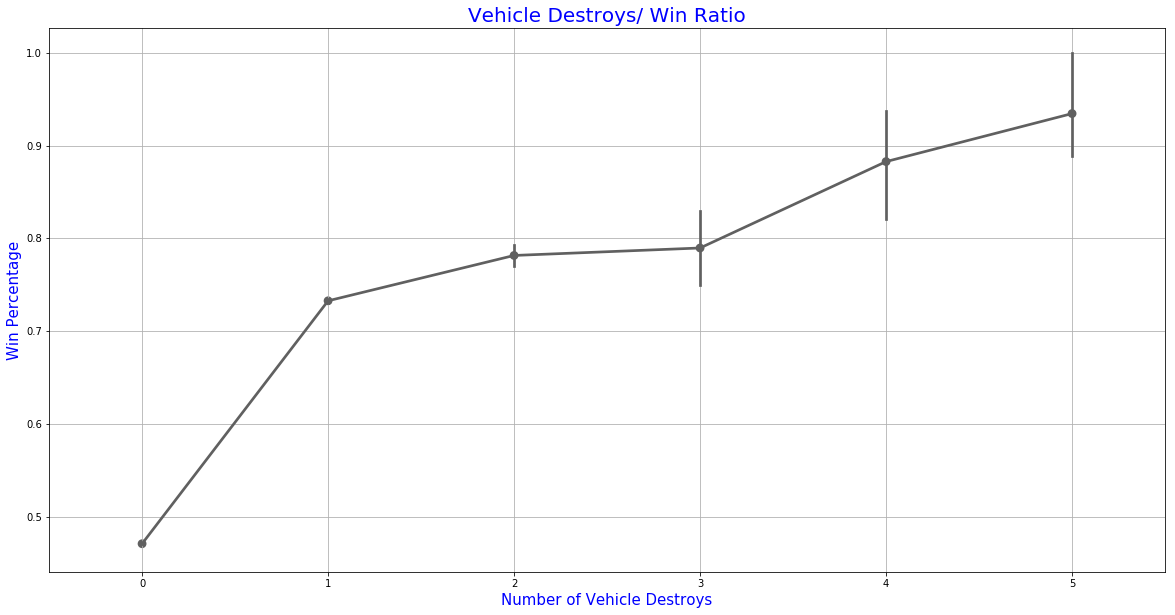

In [27]:
f,ax1 = plt.subplots(figsize =(20,10))
sns.pointplot(x='vehicleDestroys',y='winPlacePerc',data=train,color='#606060',alpha=0.8)
plt.xlabel('Number of Vehicle Destroys',fontsize = 15,color='blue')
plt.ylabel('Win Percentage',fontsize = 15,color='blue')
plt.title('Vehicle Destroys/ Win Ratio',fontsize = 20,color='blue')
plt.grid()

### So ,My experience was correct.  Destroying a single vehicle increases your chances of winning!

### Miechal phelps:  Lets  see the  winning chance of player according to their swimming ability

In [28]:
text = """
###     The average person swims for {:.1f}m,

###     99% of people have swimmed {}m or less,

###     while the olympic champion swimmed for {}m.

"""
display(Markdown(text.format(train['swimDistance'].mean(), train['swimDistance'].quantile(0.99), train['swimDistance'].max())))


###     The average person swims for 4.5m,

###     99% of people have swimmed 123.0m or less,

###     while the olympic champion swimmed for 3823.0m.



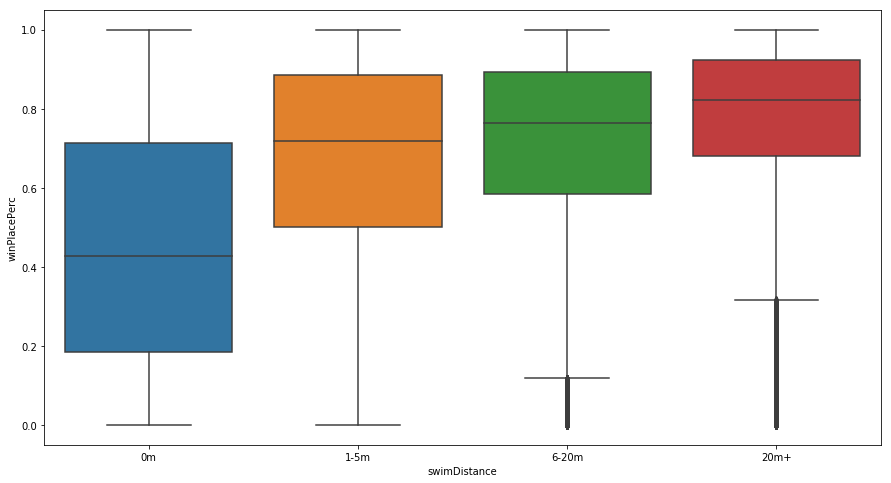

In [29]:
swim = train.copy()

swim['swimDistance'] = pd.cut(swim['swimDistance'], [-1, 0, 5, 20, 5286], labels=['0m','1-5m', '6-20m', '20m+'])
plt.figure(figsize=(15,8))
sns.boxplot(x="swimDistance", y="winPlacePerc", data=swim)

####  Its looks like  that if you swim, you rise to the top.Since  in PUBG there are currently 4 maps. One of them has almost no water. Keep that in mind we can still dive deep to calculate winning chance of player

### Healing the game partner

In [30]:
text = """
####    The average person uses {:.1f} heal items,

####    99% of people use {} or less,

####    while the doctor used {}.

"""

display(Markdown(text.format(train['heals'].mean(), train['heals'].quantile(0.99), train['heals'].max())))

text = """
####    The average person uses {:.1f} boost items,

####    99% of people use {} or less,

####    while the doctor used {}.
"""
display(Markdown(text.format(train['boosts'].mean(), train['boosts'].quantile(0.99), train['boosts'].max())))


####    The average person uses 1.4 heal items,

####    99% of people use 12.0 or less,

####    while the doctor used 80.




####    The average person uses 1.1 boost items,

####    99% of people use 7.0 or less,

####    while the doctor used 33.


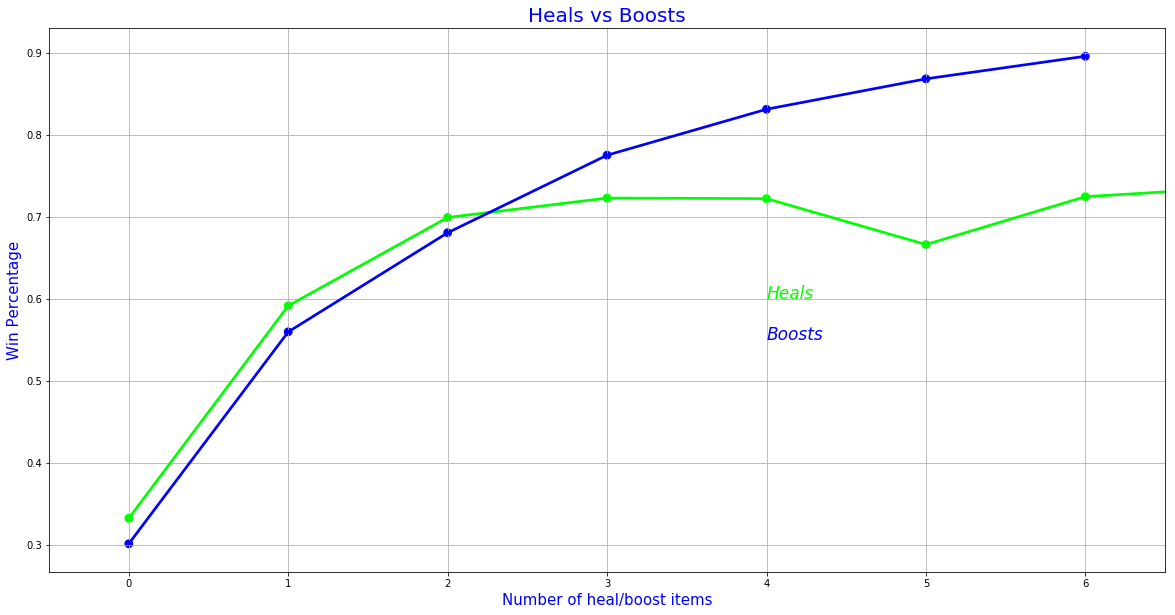

In [31]:
data = train.copy()
data = data[data['heals'] < data['heals'].quantile(0.99)]
data = data[data['boosts'] < data['boosts'].quantile(0.99)]

f,ax1 = plt.subplots(figsize =(20,10))
sns.pointplot(x='heals',y='winPlacePerc',data=data,color='lime',alpha=0.8)
sns.pointplot(x='boosts',y='winPlacePerc',data=data,color='blue',alpha=0.8)

plt.text(4,0.6,'Heals',color='lime',fontsize = 17,style = 'italic')
plt.text(4,0.55,'Boosts',color='blue',fontsize = 17,style = 'italic')

plt.xlabel('Number of heal/boost items',fontsize = 15,color='blue')
plt.ylabel('Win Percentage',fontsize = 15,color='blue')

plt.title('Heals vs Boosts',fontsize = 20,color='blue')
plt.grid()

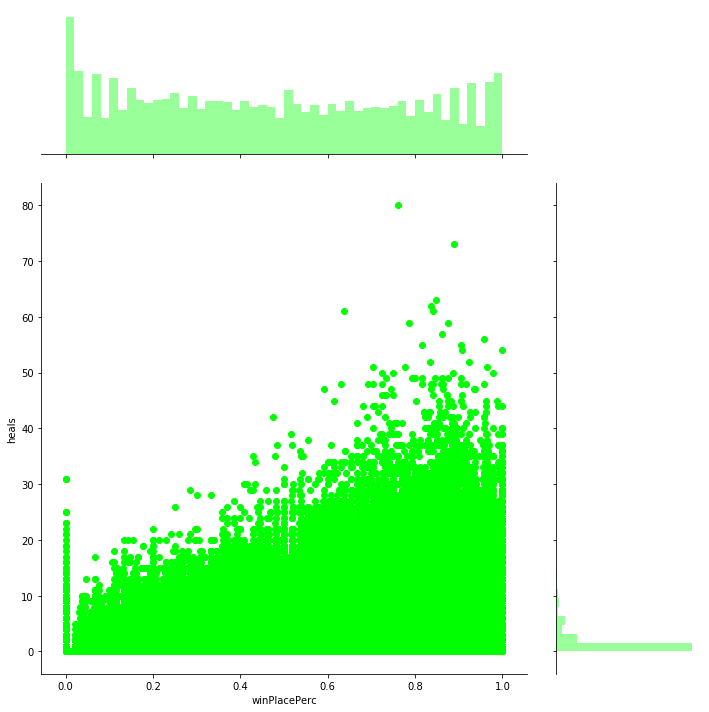

In [32]:
sns.jointplot(x="winPlacePerc", y="heals", data=train, height=10, ratio=3, color="lime")

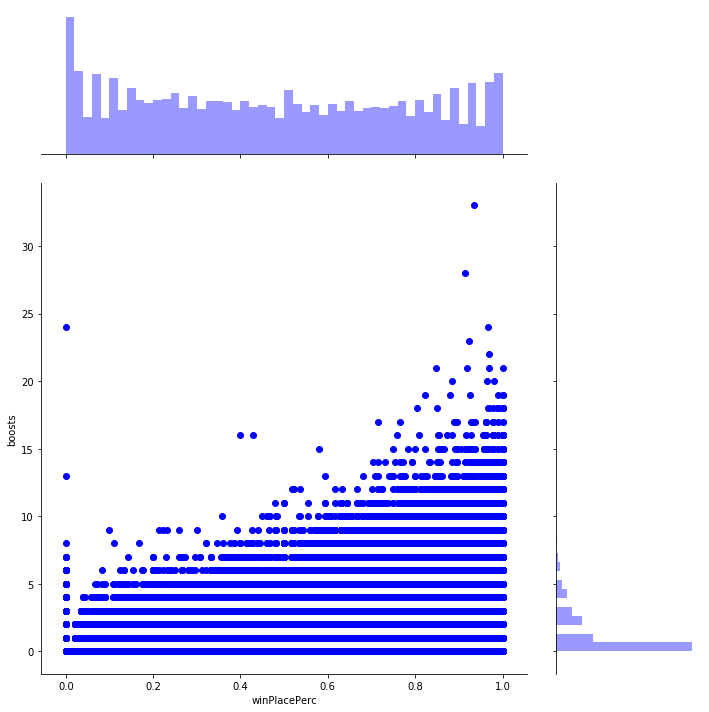

In [33]:
sns.jointplot(x="winPlacePerc", y="boosts", data=train, height=10, ratio=3, color="blue")

### So healing and boosting, definitely are correlated with winPlacePerc. Boosting is more

### In every plot, there is an abnormal behavior when values are 0.

###  According to my experience, Game mode directly affect the Winning and losing chance  in  combination with your set of skills and Game partner

### One can play solo, or with a friend (duo), or with 3 other friends (squad). 100 players join the same server, so in the case of duos the max teams are 50 and in the case of squads the max teams are 25.

In [34]:
solos = train[train['numGroups']>50]
duos = train[(train['numGroups']>25) & (train['numGroups']<=50)]
squads = train[train['numGroups']<=25]

text = """
####    There are {} ({:.2f}%) solo games,
####    {} ({:.2f}%) duo games and
####    {} ({:.2f}%) squad games.

"""
display(Markdown(text.format(len(solos), 100*len(solos)/len(train), len(duos), 100*len(duos)/len(train), len(squads), 100*len(squads)/len(train),)))


####    There are 709111 (15.95%) solo games,
####    3295326 (74.10%) duo games and
####    442528 (9.95%) squad games.



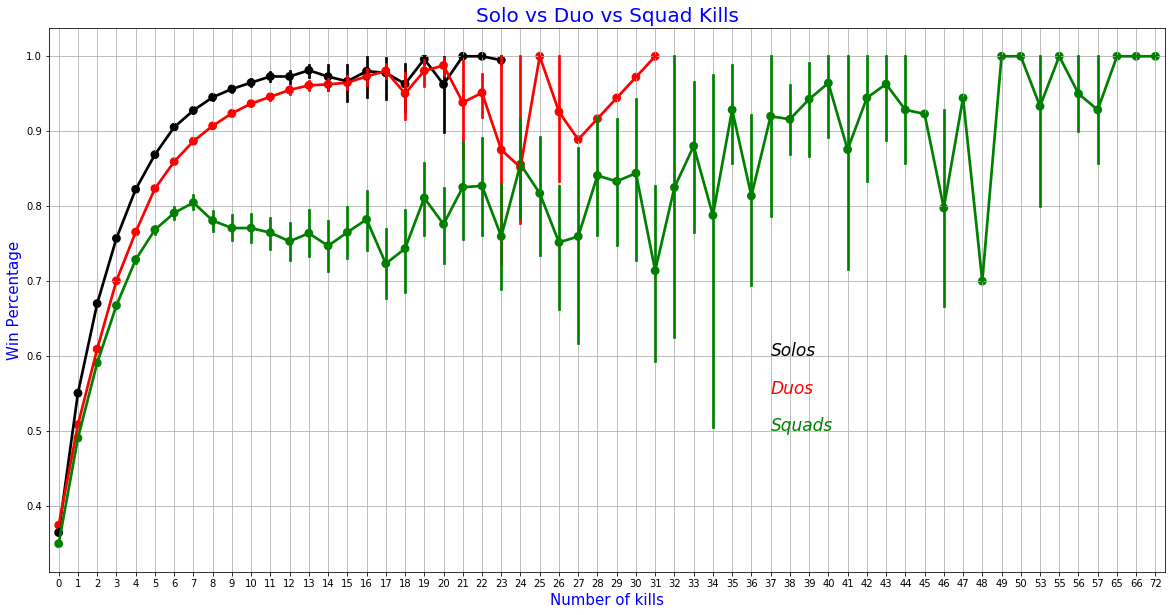

In [35]:
f,ax1 = plt.subplots(figsize =(20,10))
sns.pointplot(x='kills',y='winPlacePerc',data=solos,color='black',alpha=0.8)
sns.pointplot(x='kills',y='winPlacePerc',data=duos,color='red',alpha=0.8)
sns.pointplot(x='kills',y='winPlacePerc',data=squads,color='green',alpha=0.8)

plt.text(37,0.6,'Solos',color='black',fontsize = 17,style = 'italic')
plt.text(37,0.55,'Duos',color='red',fontsize = 17,style = 'italic')
plt.text(37,0.5,'Squads',color='green',fontsize = 17,style = 'italic')

plt.xlabel('Number of kills',fontsize = 15,color='blue')
plt.ylabel('Win Percentage',fontsize = 15,color='blue')
plt.title('Solo vs Duo vs Squad Kills',fontsize = 20,color='blue')
plt.grid()

### Above we can see that Solo and Duos game play bahave the same  i.e More the kill more the winning chance.

### But in squad, Kills dont matter much

#### The attribute DBNOs means enemy players knocked. A "knock" can happen only in duos or squads, because the teammates have the chance to "revive" the knocked player in a given time. So a knocked player can be revived or die. If he is revived, the next time he will be knocked, his teammates will have less time to revive him.

### The attribute assist can also happen only in duos or squads. It generally means that the player had an involvement in a kill.

### The attribute revive also happens in duos or squads.

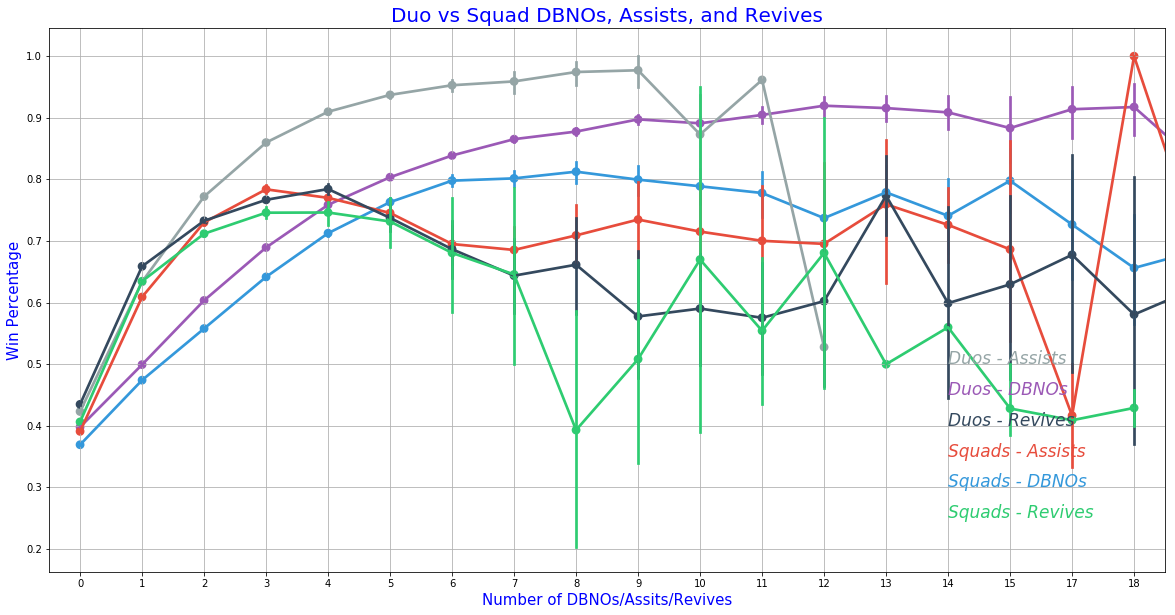

In [36]:
f,ax1 = plt.subplots(figsize =(20,10))

colors = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]


g1 = sns.pointplot(x='DBNOs',y='winPlacePerc',data=duos, color=colors[0],alpha=0.8)
g2 = sns.pointplot(x='DBNOs',y='winPlacePerc',data=squads, color=colors[1],alpha=0.8)
g3 = sns.pointplot(x='assists',y='winPlacePerc',data=duos, color=colors[2],alpha=0.8)
g4 = sns.pointplot(x='assists',y='winPlacePerc',data=squads, color=colors[3],alpha=0.8)
g5 = sns.pointplot(x='revives',y='winPlacePerc',data=duos, color=colors[4],alpha=0.8)
g6 = sns.pointplot(x='revives',y='winPlacePerc',data=squads, color=colors[5],alpha=0.8)

plt.text(14,0.5, 'Duos - Assists',color=colors[2], fontsize = 17,style = 'italic')
plt.text(14,0.45, 'Duos - DBNOs',color=colors[0], fontsize = 17,style = 'italic')
plt.text(14,0.4, 'Duos - Revives',color=colors[4], fontsize = 17,style = 'italic')
plt.text(14,0.35, 'Squads - Assists',color=colors[3], fontsize = 17,style = 'italic')
plt.text(14,0.3, 'Squads - DBNOs',color=colors[1], fontsize = 17,style = 'italic')
plt.text(14,0.25, 'Squads - Revives',color=colors[5], fontsize = 17,style = 'italic')

plt.xlabel('Number of DBNOs/Assits/Revives',fontsize = 15,color='blue')
plt.ylabel('Win Percentage',fontsize = 15,color='blue')
plt.title('Duo vs Squad DBNOs, Assists, and Revives',fontsize = 20,color='blue')
plt.grid()

### From above plots we can see that  assists and DBNOs i.e (no of enemy played knocked out)  directly affect your game winning chance in Duos game mode.

### But same features dosen't affect much in case of Squad game mode

### Correlation between the features

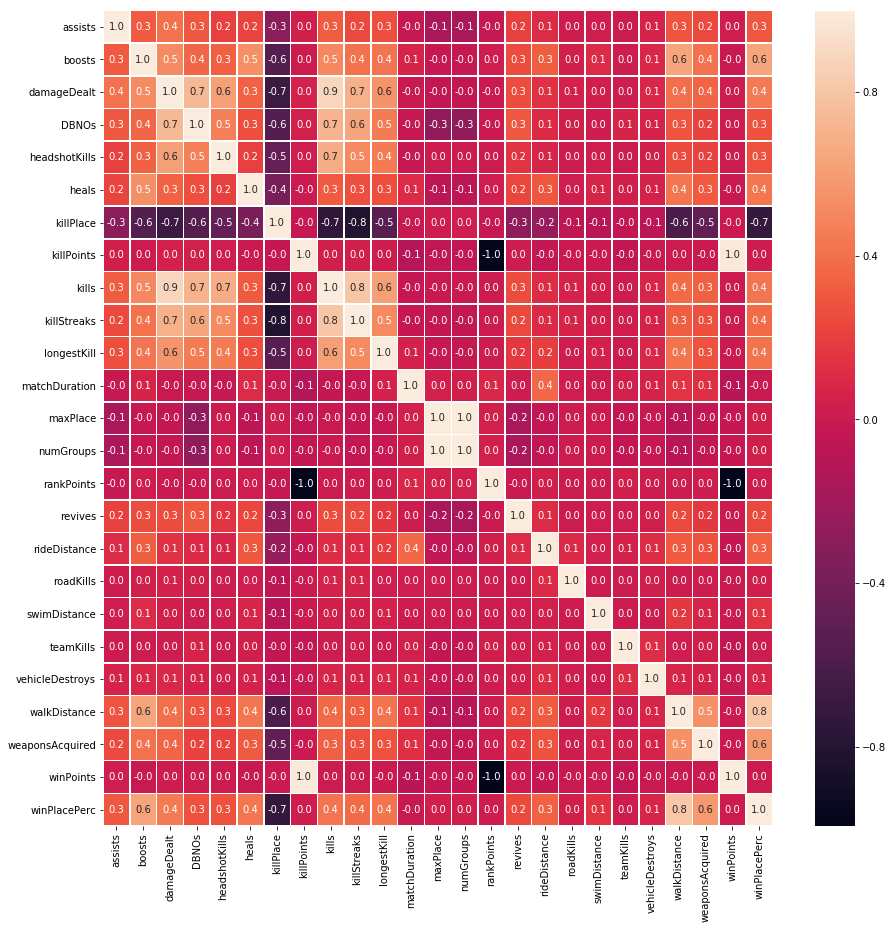

In [37]:
f,ax = plt.subplots(figsize=(15, 15))
sns.heatmap(train.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

### Lets inspect Highly positive correlated  features against Winning placement

In [47]:
train.corr()['winPlacePerc'][train.corr()['winPlacePerc'] > 0.4]

boosts             0.634234
damageDealt        0.440507
heals              0.427857
kills              0.419916
longestKill        0.410154
walkDistance       0.810888
weaponsAcquired    0.583806
winPlacePerc       1.000000
Name: winPlacePerc, dtype: float64

###  Lets inspect Highly Negative correlated features against Winning placement

In [46]:
train.corr()['winPlacePerc'][train.corr()['winPlacePerc'] < -0.4]

killPlace   -0.719069
Name: winPlacePerc, dtype: float64

In [49]:
train.columns.values

array(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt',
       'DBNOs', 'headshotKills', 'heals', 'killPlace', 'killPoints',
       'kills', 'killStreaks', 'longestKill', 'matchDuration',
       'matchType', 'maxPlace', 'numGroups', 'rankPoints', 'revives',
       'rideDistance', 'roadKills', 'swimDistance', 'teamKills',
       'vehicleDestroys', 'walkDistance', 'weaponsAcquired', 'winPoints',
       'winPlacePerc'], dtype=object)

In [52]:
train.matchType.unique()

array(['squad-fpp', 'duo', 'solo-fpp', 'squad', 'duo-fpp', 'solo',
       'normal-squad-fpp', 'crashfpp', 'flaretpp', 'normal-solo-fpp',
       'flarefpp', 'normal-duo-fpp', 'normal-duo', 'normal-squad',
       'crashtpp', 'normal-solo'], dtype=object)

###  We can see that KillPlace , walkDistance, WeaponsAcquired, Boosts are highly correlated with Winning Placement

### A pubg player you can easily findout that there are some  feature missing in this dataset  like TotalPlayerCount in single game and we can notice some outliers

### Creating new dataset for adding some important features

In [53]:
train_new = train.copy()

#### A game in PUBG can have up to 100 players fighting each other. But most of the times a game isn't "full". There is no variable that gives us the number of players joined. So lets create one.

In [54]:
train_new['playersJoined'] = train_new.groupby('matchId')['matchId'].transform('count')

Text(0.5, 1.0, 'Players Joined')

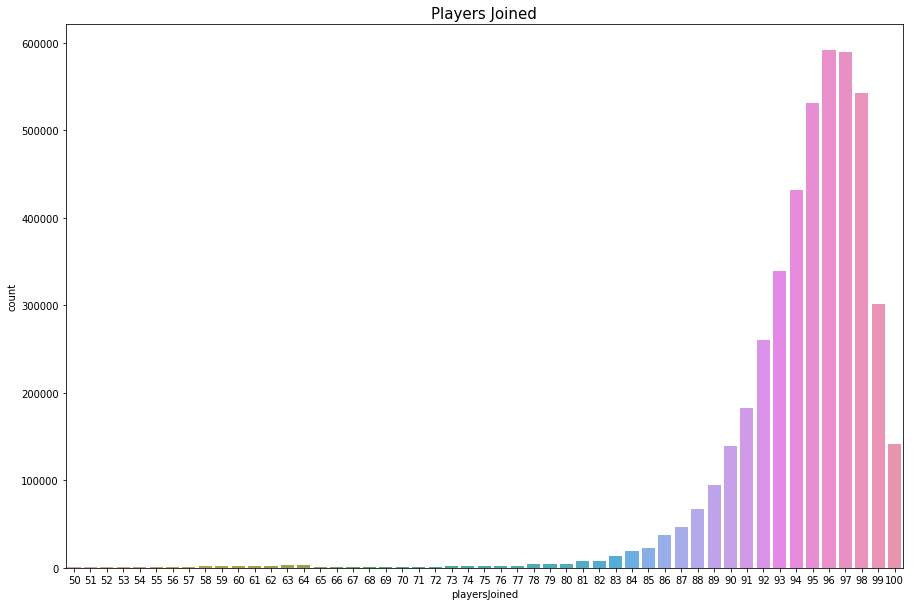

In [56]:
data = train_new.copy()
data = data[data['playersJoined']>49]
plt.figure(figsize=(15,10))
sns.countplot(data['playersJoined'])
plt.title("Players Joined",fontsize=15)

### Another simple feature is the sum of heals and boosts. Also the sum of total distance travelled.

In [57]:
train_new['healsAndBoosts'] = train_new['heals']+train_new['boosts']
train_new['totalDistance'] = train_new['walkDistance']+train_new['rideDistance']+train_new['swimDistance']

### Lets create new feature called team which signifies type of game players are playing

In [58]:
train_new['team'] = ['solo' if i>50 else 'Duo' if (i>25 & i<=50) else 'Squad' for i in train_new['numGroups']]

In [60]:
train_new.tail(5)

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,playersJoined,healsAndBoosts,totalDistance,team
4446961,afff7f652dbc10,d238e426f50de7,18492834ce5635,0,0,0.00,0,0,0,74,...,0,0,1019.0,3,1507,0.1786,94,0,2311.000,Duo
4446962,f4197cf374e6c0,408cdb5c46b2ac,ee854b837376d9,0,1,44.15,0,0,0,69,...,0,0,81.7,6,0,0.2935,93,1,81.700,solo
4446963,e1948b1295c88a,e26ac84bdf7cef,6d0cd12784f1ab,0,0,59.06,0,0,0,66,...,0,0,788.7,4,0,0.4815,98,0,790.884,Duo
4446964,cc032cdd73b7ac,c2223f35411394,c9c701d0ad758a,0,4,180.40,1,1,2,11,...,0,0,2748.0,8,0,0.8000,94,6,2748.000,Squad
4446965,0d8e7ed728b6fd,8c74f72fedf5ff,62a16aabcc095c,0,2,268.00,0,0,1,18,...,0,0,1244.0,5,0,0.5464,98,3,2613.000,solo


### Trying to find outlier if any

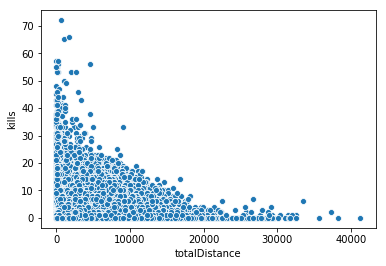

In [77]:
sns.scatterplot(x='totalDistance',y='kills',data=train_new)

### these kills without moving is cheaters  and should be treated like outlier

In [79]:
train_new['killsWithoutMove']=((train_new['kills']>0)&(train_new['totalDistance']==0))

In [80]:
train_new['killsWithoutMove'].value_counts()

False    4445430
True        1535
Name: killsWithoutMove, dtype: int64

### Hence we have to remove these outlier

In [81]:
train_new.drop(train_new[train_new['killsWithoutMove']==True].index,inplace=True)

In [83]:
train_new['killsWithoutMove'].value_counts()

False    4445430
Name: killsWithoutMove, dtype: int64

In [85]:
train_new.drop(columns=['killsWithoutMove'], axis=1,inplace=True)

In [86]:
train_new.columns.values

array(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt',
       'DBNOs', 'headshotKills', 'heals', 'killPlace', 'killPoints',
       'kills', 'killStreaks', 'longestKill', 'matchDuration',
       'matchType', 'maxPlace', 'numGroups', 'rankPoints', 'revives',
       'rideDistance', 'roadKills', 'swimDistance', 'teamKills',
       'vehicleDestroys', 'walkDistance', 'weaponsAcquired', 'winPoints',
       'winPlacePerc', 'playersJoined', 'healsAndBoosts', 'totalDistance',
       'team'], dtype=object)

### After removing some Outlier We are good to go for feature extraction

In [87]:
train = train_new.copy()

### First Manually extracting the important features